# First Name: Richard
# Last Name: Setiawan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [4]:
gapminder['oilperperson'] = pd.to_numeric(gapminder['oilperperson'],errors='coerce')
gapminder['relectricperperson'] = pd.to_numeric(gapminder['relectricperperson'],errors='coerce')
gapminder['co2emissions'] = pd.to_numeric(gapminder['co2emissions'],errors='coerce')

# Scenario 1 - Linear & Multiple

# sub1 

In [5]:
sub1 = gapminder[['oilperperson', 'relectricperperson', 'co2emissions']].dropna()
sub1.head()

,oilperperson,relectricperperson,co2emissions
2,0.42,590.51,2932108666.67
6,0.64,768.43,5872119000.00
9,1.91,2825.39,12970092666.67
10,1.55,2068.12,4466084333.33
11,0.36,921.56,511107666.67


# Centre oilperperson, relectricperperson and co2emissions
# use sub1

In [6]:
# center quantitative variables for regression analysis
sub1['oilperperson_c'] = (sub1['oilperperson'] - sub1['oilperperson'].mean())
sub1['relectricperperson_c'] = (sub1['relectricperperson'] - sub1['relectricperperson'].mean())
sub1['co2emissions_c'] = (sub1['co2emissions'] - sub1['co2emissions'].mean())

sub1.head()

,oilperperson,relectricperperson,co2emissions,oilperperson_c,relectricperperson_c,co2emissions_c
2,0.42,590.51,2932108666.67,-1.06,-1145.94,-12353375047.62
6,0.64,768.43,5872119000.00,-0.85,-968.02,-9413364714.29
9,1.91,2825.39,12970092666.67,0.43,1088.94,-2315391047.62
10,1.55,2068.12,4466084333.33,0.06,331.68,-10819399380.95
11,0.36,921.56,511107666.67,-1.12,-814.89,-14774376047.62


# Multi variable linear regression 
# predict co2emission(y) using relectricperperson(x1) and oilperperson(x2)
# use sub1

In [7]:
reg1 = smf.ols('co2emissions_c  ~ relectricperperson_c + oilperperson_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         co2emissions_c   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6205
Date:                Sat, 04 Jan 2020   Prob (F-statistic):              0.541
Time:                        12:18:49   Log-Likelihood:                -1632.7
No. Observations:                  63   AIC:                             3271.
Df Residuals:                      60   BIC:                             3278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.669e-06 

# Scenario 2 - Linear
# sub2

In [8]:
# convert to numeric format
gapminder['employrate'] = pd.to_numeric(gapminder['employrate'], errors='coerce')
sub2 = gapminder[['relectricperperson', 'employrate']].dropna()
sub2.head()

,relectricperperson,employrate
1,636.34,51.40
2,590.51,50.50
4,173.00,75.70
6,768.43,58.40
7,603.76,40.10


# scatter plot to show relationship between employment rate (x) and electricity use per person (y)

<IPython.core.display.Javascript object>


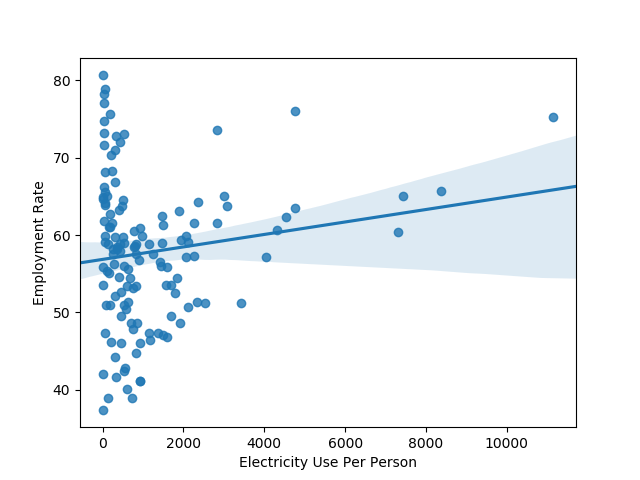

Text(0, 0.5, 'Employment Rate')

In [10]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="relectricperperson", y="employrate", fit_reg=True, data=sub2)

plt.xlabel('Electricity Use Per Person')
plt.ylabel('Employment Rate')

# Centre relectricperperson and employrate
# use sub2

In [11]:
sub2['relectricperperson_c'] = (sub2['relectricperperson'] - sub2['relectricperperson'].mean())
sub2['employrate_c'] = (sub2['employrate'] - sub2['employrate'].mean())

sub2.head()

,relectricperperson,employrate,relectricperperson_c,employrate_c
1,636.34,51.40,-543.99,-6.41
2,590.51,50.50,-589.82,-7.31
4,173.00,75.70,-1007.33,17.89
6,768.43,58.40,-411.90,0.59
7,603.76,40.10,-576.57,-17.71


# Linear regression between relectricperperson (x) and employrate (y)
# use sub2

In [12]:
reg2 = smf.ols('employrate_c ~ relectricperperson_c', data=sub2).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:           employrate_c   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.877
Date:                Sat, 04 Jan 2020   Prob (F-statistic):             0.0922
Time:                        12:34:05   Log-Likelihood:                -487.37
No. Observations:                 134   AIC:                             978.7
Df Residuals:                     132   BIC:                             984.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.607e-15 

# Scenario 3 - Polynomial

# scatter plot to show polynomial (order 2) relationship between employment rate (x) and electricity use per person (y)

<IPython.core.display.Javascript object>


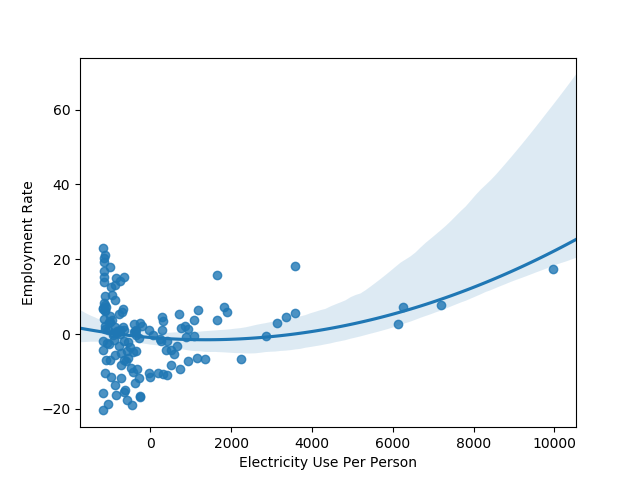

Text(0, 0.5, 'Employment Rate')

In [13]:
#fit second order polynomial
# run the 2 scatterplots together to get second order fit lines
plt.figure()
scat1 = sns.regplot(x="relectricperperson_c", y="employrate_c", order=2, data=sub2)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Employment Rate')

# Polynomial regression between relectricperperson (x - order 2) and employrate (y)
# use sub2

In [14]:
reg2 = smf.ols('employrate_c ~  I(relectricperperson_c**2)', data=sub2).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:           employrate_c   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.606
Date:                Sat, 04 Jan 2020   Prob (F-statistic):            0.00664
Time:                        12:34:05   Log-Likelihood:                -485.06
No. Observations:                 134   AIC:                             974.1
Df Residuals:                     132   BIC:                             979.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Scenario 4 - Multiple & poly
# sub3

In [15]:
sub3 = gapminder[['oilperperson', 'relectricperperson', 'co2emissions','employrate']].dropna()
sub3.head()

,oilperperson,relectricperperson,co2emissions,employrate
2,0.42,590.51,2932108666.67,50.50
6,0.64,768.43,5872119000.00,58.40
9,1.91,2825.39,12970092666.67,61.50
10,1.55,2068.12,4466084333.33,57.10
11,0.36,921.56,511107666.67,60.90


# Centre employrate, oilperperson, relectricperperson and co2emissions
# use sub3

In [16]:
sub3['employrate_c'] = (sub3['employrate'] - sub3['employrate'].mean())
sub3['oilperperson_c'] = (sub3['oilperperson'] - sub3['oilperperson'].mean())
sub3['relectricperperson_c'] = (sub3['relectricperperson'] - sub3['relectricperperson'].mean())
sub3['co2emissions_c'] = (sub3['co2emissions'] - sub3['co2emissions'].mean())

# Multiple and polynomial regression between oilperperson(x1) + co2emissions(x2)  relectricperperson (x3 - order 2) and employrate (y)
# use sub3

In [17]:
reg3 = smf.ols('employrate_c ~ oilperperson_c + co2emissions_c + I(relectricperperson_c**2)', data=sub3).fit() 
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:           employrate_c   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.481
Date:                Sat, 04 Jan 2020   Prob (F-statistic):            0.00670
Time:                        12:34:06   Log-Likelihood:                -210.13
No. Observations:                  63   AIC:                             428.3
Df Residuals:                      59   BIC:                             436.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Evaluating model

# Plot qqplot for the above regression (reg3)

<IPython.core.display.Javascript object>


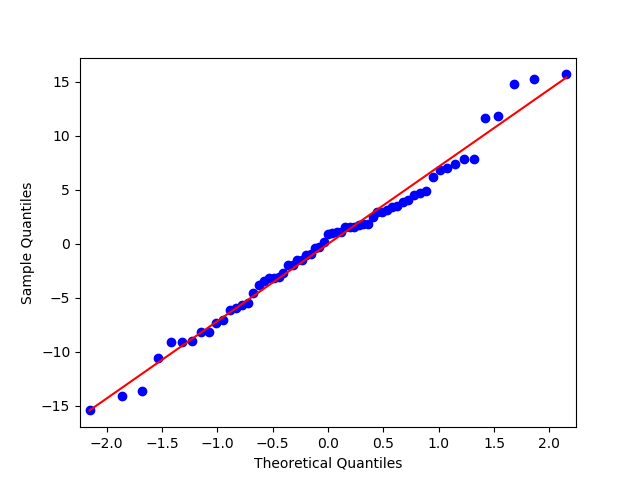

In [18]:
import statsmodels.api as sm
fig4=sm.qqplot(reg3.resid, line='r')

# Residual plot for the above regression (reg3)

<IPython.core.display.Javascript object>


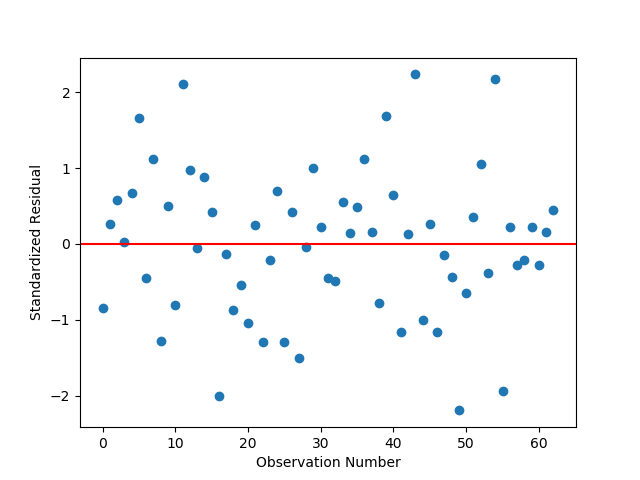

Text(0.5, 0, 'Observation Number')

In [19]:
# simple plot of residuals
stdres=pd.DataFrame(reg3.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

# Calculate percentage of observations over 2 standardized deviation 

In [20]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

7.936507936507936


# Calculate percentage of observations over 2.5 standardized deviation 

In [21]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

0.0


# On your own 

# experiment with explanatory variable (oilperperson, co2emissions, relectricperperson) and their order  to predict employrate

# use sub3

In [27]:
reg4 = smf.ols('employrate_c ~ co2emissions_c +  relectricperperson_c+ I(oilperperson_c**2)', data=sub3).fit()
print (reg4.summary())

                            OLS Regression Results                            
Dep. Variable:           employrate_c   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.756
Date:                Sat, 04 Jan 2020   Prob (F-statistic):             0.0155
Time:                        12:34:35   Log-Likelihood:                -211.09
No. Observations:                  63   AIC:                             430.2
Df Residuals:                      59   BIC:                             438.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

# Evaluate your model
# Use ggplot

<IPython.core.display.Javascript object>


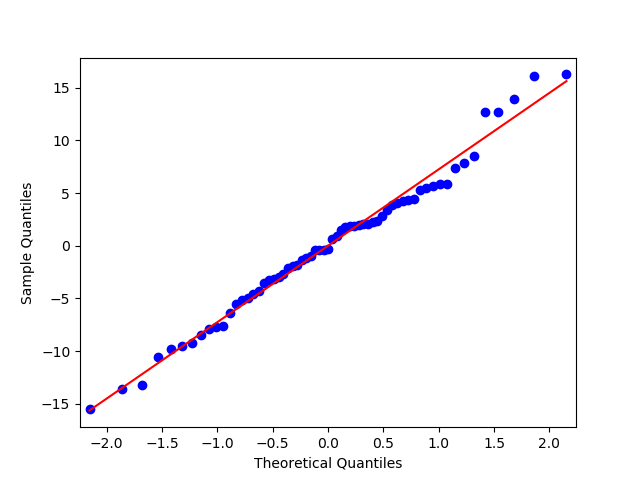

In [28]:
import statsmodels.api as sm
fig5=sm.qqplot(reg4.resid, line='r')

# Evaluate your model
# Use residual plot 

<IPython.core.display.Javascript object>


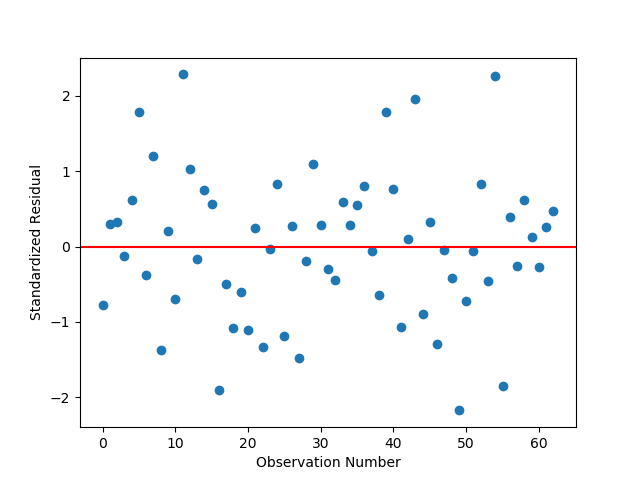

Text(0.5, 0, 'Observation Number')

In [29]:
# simple plot of residuals
stdres=pd.DataFrame(reg4.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

# Calculate percentage of observations over 2 standardized deviation 

In [30]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

4.761904761904762


# Calculate percentage of observations over 2.5 standardized deviation 

In [31]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

0.0
